In [294]:
import pandas as pd
hh_data = pd.read_csv('dst-3.0_16_1_hh_database.csv',sep=';')
hh_df = hh_data.copy()

In [295]:
hh_data.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


# Исследование структуры данных

**Размерность таблицы**

In [296]:
hh_data.shape 

(44744, 12)

**Все признаки в таблице имеют тип данных "object"**

**В признаках "Опыт работы", "Последнее/нынешнее место работы", "Последняя/нынешняя должность" имеются пропуски**

In [297]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

**Сколько уникальных значений содержатся в столбце «Опыт работы»**

In [298]:
hh_data['Опыт работы'].nunique()

44413

**Самая распространенная желаемая должность**

In [299]:
hh_data['Ищет работу на должность:'].mode()[0]

'Системный администратор'

# Предобработка данных

**Создание признака "Образование"**

In [300]:
def level_len(arg): #функция для создания признака "Образование"
    arg_list= arg.split() # Разделение строки по пробелам
    if arg_list[0] == 'Высшее':
        return 'высшее'
    if arg_list[0] == 'Неоконченное':
        return 'неоконченное высшее'
    if arg_list[0] + ' '+ arg_list[1] == 'Среднее специальное':
        return 'среднее специальное'
    if arg_list[0] + ' '+ arg_list[1] == 'Среднее образование':
        return 'среднее'

hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(level_len)
school_grads_count = hh_df['Образование'].value_counts().loc['среднее'] #Сколько соискателей имеет средний уровень образования (школьное образование)
print(f'Сколько соискателей имеет средний уровень образования (школьное образование): {school_grads_count}')
hh_df.drop(['Образование и ВУЗ'], axis=1, inplace=True) # Удаляем теперь не нужный признак

Сколько соискателей имеет средний уровень образования (школьное образование): 559


**Создание признаков "Пол" и "Возраст"**

In [301]:
def sex(arg): #функция для создания признака "Пол"
    arg_list = arg.split(',') # Разделение строки по запятой
    x = arg_list[0].rstrip() # Удаление пробела в конце строки и вывод слова
    if x == 'Женщина': # Замена слова "Женщина: на "Ж"
        return 'Ж'
    else:
        return 'М'

def age(arg): #функция для создания признака "Возраст"
    arg_list = arg.split(',') # Разделение строки по запятой
    new_num = arg_list[1].split()[0] # Из полученного списка по индексу берем строку '  39 лет ' и извлекаем 39
    return new_num
    
hh_df['Пол'] = hh_df['Пол, возраст'].apply(sex).astype('category') 
hh_df['Возраст'] = hh_df['Пол, возраст'].apply(age).astype('int64') 
w_per = round(hh_df['Пол'].value_counts(normalize=True)['Ж']*100, 2) # Процент женских резюме представленных в данных
mean_age = round(hh_df['Возраст'].mean(),1) # Cредний возраст соискателей
print(f'Процент женских резюме представленных в данных: {w_per}')
print(f'Cредний возраст соискателей: {mean_age}')
hh_df.drop('Пол, возраст', axis=1, inplace=True) # Удаляем теперь не нужный признак

Процент женских резюме представленных в данных: 19.07
Cредний возраст соискателей: 32.2


**Создание признака «Опыт работы (месяц)»**

In [302]:
import numpy as np
def experience(arg): # Функция для создания признака "Опыт работы (месяц)"
    if arg == 'Не указано': # Находим строки 'Не указано'
        arg = np.NaN # Заменяем на NaN
        return arg 
    s = 0 # Счетчик месяцев
    arg_list = str(arg).split()[0:6] # Разделяем строки и выбираем нужную часть
    if arg_list[0] == 'nan': # находим значения NaN
        return np.NaN # Оставляем как есть
    for index in range(len(arg_list)): # проходимся по индексам словаря arg_list
        if (arg_list[index] == 'год') or (arg_list[index] == 'года') or (arg_list[index] == 'лет'): # поиск опыта работы в годах
            s += int(arg_list[index - 1]) * 12 
        elif (arg_list[index] == 'месяц') or (arg_list[index] == 'месяца') or (arg_list[index] == 'месяцев'): # поиск опыта работы в месяцах
            s += int(arg_list[index - 1])
    return s
    
hh_df['Опыт работы (месяц)'] =  hh_df['Опыт работы'].apply(experience)
median_exp = hh_df['Опыт работы (месяц)'].median()
print(f'Медианный опыт работы: {median_exp}')
hh_df.drop('Опыт работы', axis=1, inplace=True) # Удаляем теперь не нужный признак

Медианный опыт работы: 100.0


**Создадание признаков: «Город», «Готовность к переезду», «Готовность к командировкам»**

In [303]:
def get_city(arg): #функция для создания признака "Город"
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород',
                      'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 
                      'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
                     ]
    city = arg.split(' , ')[0] # разделение строки на список по ' , ' и берем нужный элемент по индексу
    if (city == 'Москва') or (city == 'Санкт-Петербург'): # Поиск Москвы и Санкт-Петербурга 
        return city
    elif city in million_cities: #Поиск городов миллионников
        return 'город миллионник'
    else:
        return 'другие'
    
def get_ready_to_move(arg): #функция для создания признака "Готовность к переезду"
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg): # Поиск в строке готовности к переезду
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True
    
def get_ready_for_bisiness_trips(arg): #функция для создания признака "Готовность к командировкам"
    if ('командировка' in arg): # Поиск слова командировка
        if ('не готов к командировкам' in arg) or('не готова к командировкам' in arg):
            return False
        else: 
            
            return True
    else:
        return False
    
hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(get_city)
hh_df['Готовность к переезду'] = hh_df['Город, переезд, командировки'].apply(get_ready_to_move)
hh_df['Готовность к командировкам'] = hh_df['Город, переезд, командировки'].apply(get_ready_for_bisiness_trips)
spb_per = round(hh_df['Город'].value_counts(normalize=True)['Санкт-Петербург'] * 100) # Процент соискателей, живущих в Санкт-Петербурге
trip_per = round(hh_df[hh_df['Готовность к переезду'] & hh_df['Готовность к командировкам']].shape[0] / hh_df.shape[0] *100) # Процент соискателей, готовых одновременно и к переездам, и к командировкам
print(f'Процент соискателей, живущих в Санкт-Петербурге: {spb_per}')
print(f'Процент соискателей, готовых одновременно и к переездам, и к командировкам: {trip_per}')
hh_df.drop('Город, переезд, командировки', axis=1, inplace= True) # Удаляем теперь не нужный признак

Процент соискателей, живущих в Санкт-Петербурге: 11
Процент соискателей, готовых одновременно и к переездам, и к командировкам: 32


**Создание признаков: "полная занятость", "частичная занятость", "проектная работа", "волонтёрство", "стажировка"**

In [304]:
def full_employment(arg): #функция для создания признака "полная занятость"
    arg_list = arg.split(', ')
    if 'полная занятость' in arg_list:
        return True
    else:
        return False
   
def partial(arg): #функция для создания признака "частичная занятость"
    arg_list = arg.split(', ')
    if 'частичная занятость' in arg_list:
        return True
    else:
        return False
    
def project_work(arg): #функция для создания признака "проектная работа"
    arg_list = arg.split(', ')
    if 'проектная работа' in arg_list:
        return True
    else:
        return False
    
def volonter(arg): #функция для создания признака "волонтерство"
    arg_list = arg.split(', ')
    if 'волонтерство' in arg_list:
        return True
    else:
        return False
    
def internship(arg): #функция для создания признака "стажировка"
    arg_list = arg.split(', ')
    if 'стажировка' in arg_list:
        return True
    else:
        return False
    
hh_df['полная занятость'] = hh_df['Занятость'].apply(full_employment)
hh_df['частичная занятость'] = hh_df['Занятость'].apply(partial)
hh_df['проектная работа'] = hh_df['Занятость'].apply(project_work)
hh_df['волонтерство'] = hh_df['Занятость'].apply(volonter)
hh_df['стажировка'] = hh_df['Занятость'].apply(internship)
project_volunteer_count = hh_df[(hh_df['проектная работа']) & (hh_df['волонтерство'])].shape[0] #Сколько людей ищут проектную работу и волонтёрство
print(f'Сколько людей ищут проектную работу и волонтёрство: {project_volunteer_count}')
hh_df.drop('Занятость', axis=1, inplace=True) # Удаляем теперь не нужный признак

Сколько людей ищут проектную работу и волонтёрство: 436


**Создание признаков: "полный день", "сменный график", "гибкий график", "удалённая работа", "вахтовый метод"**

In [305]:
def full_day(arg): #функция для создания признака "полный день"
    arg_list = arg.split(', ')
    if 'полный день' in arg_list:
        return True
    else:
        return False
   
def change(arg): #функция для создания признака "сменный график"
    arg_list = arg.split(', ')
    if 'сменный график' in arg_list:
        return True
    else:
        return False
    
def flexible(arg): #функция для создания признака "гибкий график"
    arg_list = arg.split(', ')
    if 'гибкий график' in arg_list:
        return True
    else:
        return False
    
def distant_work(arg): #функция для создания признака "удаленная раюота"
    arg_list = arg.split(', ')
    if 'удаленная работа' in arg_list:
        return True
    else:
        return False
    
def watch(arg): #функция для создания признака "вахтовый метод"
    arg_list = arg.split(', ')
    if 'вахтовый метод' in arg_list:
        return True
    else:
        return False
    
hh_df['полный день'] = hh_df['График'].apply(full_day)
hh_df['сменный график'] = hh_df['График'].apply(change)
hh_df['гибкий график'] = hh_df['График'].apply(flexible)
hh_df['удалённая работа'] = hh_df['График'].apply(distant_work)
hh_df['вахтовый метод'] = hh_df['График'].apply(watch)
shift_flex_count = hh_df[(hh_df['вахтовый метод']) & (hh_df['гибкий график'])].shape[0] #Сколько людей хотят работать вахтовым методом и с гибким графиком
print(f'Сколько людей хотят работать вахтовым методом и с гибким графиком: {shift_flex_count}')
hh_df.drop('График', axis=1, inplace=True) # Удаляем теперь не нужный признак

Сколько людей хотят работать вахтовым методом и с гибким графиком: 2311


**Создание признака "ЗП (руб)"**

In [306]:
exchane = pd.read_csv('ExchangeRates.csv') 
exchane

,currency,per,date,time,close,vol,proportion
0,USD,D,29/12/17,00:00,57.6291,0,1
1,USD,D,30/12/17,00:00,57.6002,0,1
2,USD,D,31/12/17,00:00,57.6002,0,1
3,USD,D,01/01/18,00:00,57.6002,0,1
4,USD,D,02/01/18,00:00,57.6002,0,1
...,...,...,...,...,...,...,...
5659,AZN,D,02/12/19,00:00,37.7729,0,1
5660,AZN,D,03/12/19,00:00,37.9662,0,1
5661,AZN,D,04/12/19,00:00,37.8073,0,1
5662,AZN,D,05/12/19,00:00,37.8396,0,1


In [307]:
exchane = pd.read_csv('ExchangeRates.csv') #Создаем новый DataFrame для подсчетов
hh_df['Обновление резюме'] =pd.to_datetime(hh_df['Обновление резюме']).dt.date # Изменение признака 'Обновление резюме', берется только дата
exchane['date'] = pd.to_datetime(exchane['date']).dt.date # Изменение признака 'date', берется только дата
def currency(arg): #функция для создания признака "Валюта"
    arg_list = arg.split()
    return arg_list[1].replace('.', '')

def selary(arg): #функция для создания признака "Желаемая зарплата"
    arg_list = arg.split()
    return arg_list[0]

hh_df['Валюта'] = hh_df['ЗП'].apply(currency)
hh_df['Желаемая зарплата'] = hh_df['ЗП'].apply(selary)
hh_df['Желаемая зарплата'] = hh_df['Желаемая зарплата'].astype('int')

correct_list = ['USD', 'EUR', 'KGS', 'AZN', 'KZT'] #Список валют, которые не нужно изменять

def dinero_2(din): # Функция для изменения сокращения валюты по стандартам  ISO
    if din in correct_list:
        return din
    if din  == 'руб':
        return 'RUB'
    if din  == 'белруб':
        return 'BYN'
    if din  == 'грн':
        return 'UAH'
    if din == 'сум':
        return 'UZS'
        
hh_df['Валюта'] = hh_df['Валюта'].apply(dinero_2)

merged = hh_df.merge( # Объединение таблиц
    exchane,
    left_on=['Обновление резюме', 'Валюта'],
    right_on=['date', 'currency'],
    how='left'
)
values = {
    'currency': 'RUB',
    'close': 1,
    'proportion':1
}
merged = merged.fillna(value=values) # замена пропущенных значений после объединения
hh_df['ЗП (руб)'] = merged['close'] * merged['Желаемая зарплата'] / merged['proportion']
median_salary = round(hh_df['ЗП (руб)'].median())
print(f'Желаемая медианная заработная плата соискателей: {median_salary}')
hh_df.drop(['Желаемая зарплата','Валюта','ЗП'], axis=1, inplace=True) # Удаляем теперь не нужный признак

Желаемая медианная заработная плата соискателей: 59019


# Разведывательный анализ

**Распределение признака «Возраст»**

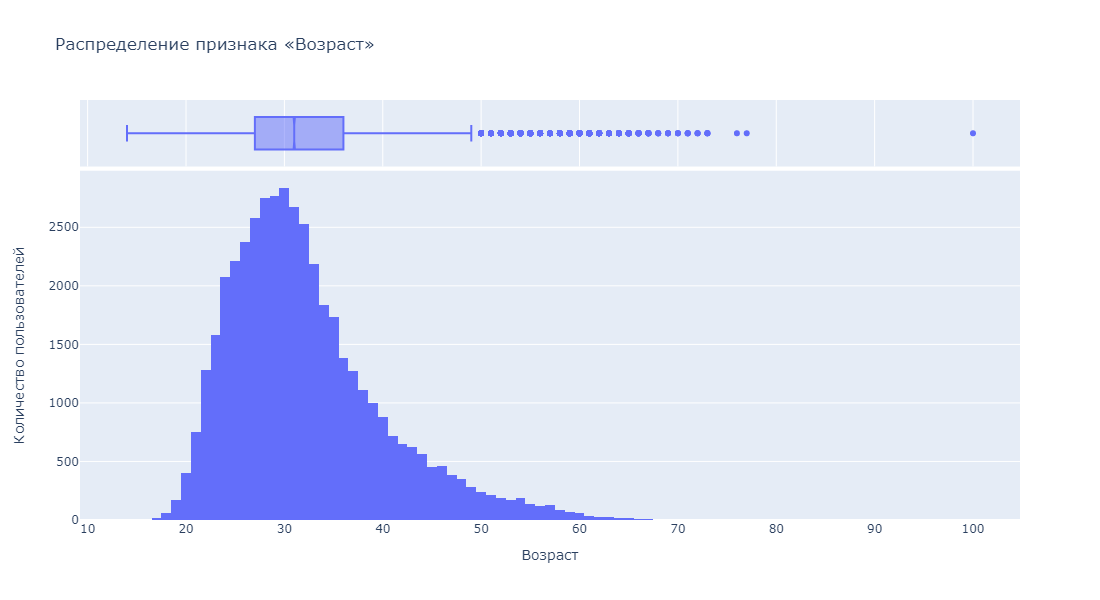

In [308]:
import plotly.express as px
fig = px.histogram( # Построение гистограммы и коробчатой диаграммы
    data_frame=hh_df,
    x='Возраст',
    title='Распределение признака «Возраст»',
    marginal='box'
)
fig.update_layout( # дополнительные настройки графика
    yaxis_title = 'Количество пользователей',
    width=1100,
    height=600
)
fig.show('png')

* __Чему равна мода распределения?__

Мода распределения равна 30.

* __Каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей?__

Предельные значения от 14 до 64. Интервал соискателей нахотся от 20 до 60 лет.

* **Есть ли аномалии для данного признака? Если есть, то какие значения вы бы причислили к таковым?**

Аномальными значениями можно считать от 60 лет. С 14 до 16 считать за аномаль не будем, так как при согласии родителей в этом возрасте можно устроиться на работу.

**Распределение признака «Опыт работы (месяц)**

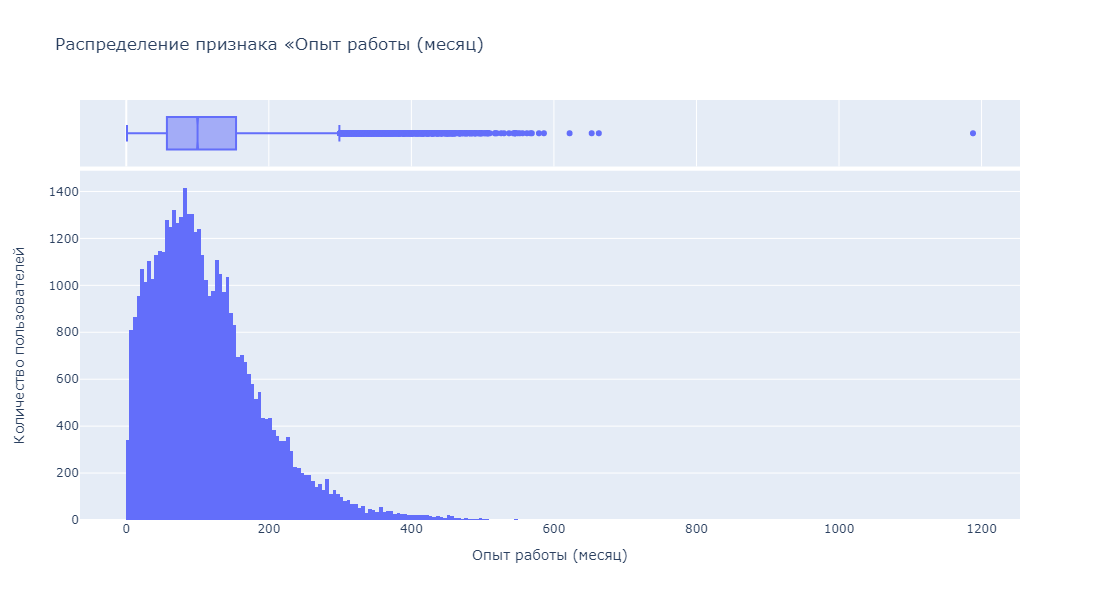

In [309]:
fig = px.histogram( # Построение гистограммы и коробчатой диаграммы
    data_frame=hh_df,
    x='Опыт работы (месяц)',
    title='Распределение признака «Опыт работы (месяц)',
    marginal='box'
)
fig.update_layout( # дополнительные настройки графика
    yaxis_title = 'Количество пользователей',
    width=1100,
    height=600
)
fig.show('png')

* Чему равна мода распределения?

Мода распределения равна от 80-84.

* Каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей?

Предельными значения являются от 0 до 300. Опыт работы большинства соискателей от 0 до 200 месяцев.  

* Есть ли аномалии для признака? Если есть, то какие значения вы бы причислили к таковым?

Аномальными значениями могут считаться от 300 месяцев, но при рассмотрении нужно опираться на возраст пользователя


**Распределение признака «ЗП (руб)**

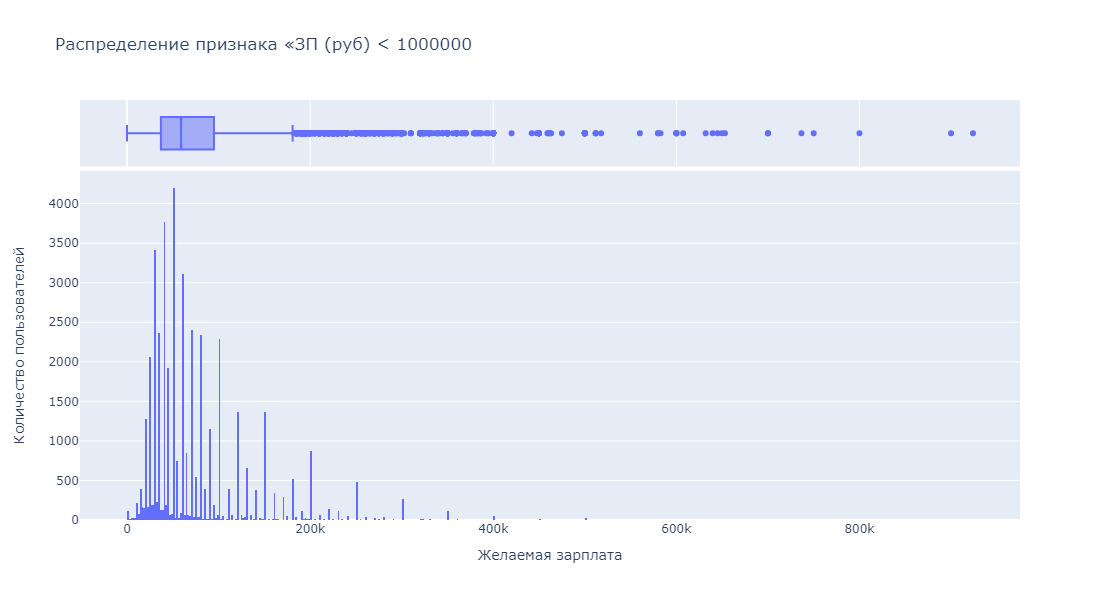

In [310]:
fig = px.histogram( # Построение гистограммы и коробчатой диаграммы
    data_frame=hh_df[hh_df['ЗП (руб)'] < 1000000],
    x='ЗП (руб)',
    marginal='box',
    title='Распределение признака «ЗП (руб) < 1000000'
)
fig.update_layout( # дополнительные настройки графика
    yaxis_title = 'Количество пользователей',
    xaxis_title = 'Желаемая зарплата',
    width=1100,
    height=600
)
fig.show('png')

*Чтобы лучше рассмотреть признак возьмем "ЗП (руб)" <1000000.*

* Чему равна мода распределения?

Мода равна 50к

* Каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей?

Предельные значения от 20к до 180к. Заработная плата большинства соискателей находится в интервале от 37к до 95к.

* Есть ли аномалии для признака заработной платы? Если есть, то какие значения вы бы причислили к таковым?

Аномальными значениями можно считать от 400к




**Зависимость медианной желаемой заработной платы («ЗП (руб)») от уровня образования («Образование»)**

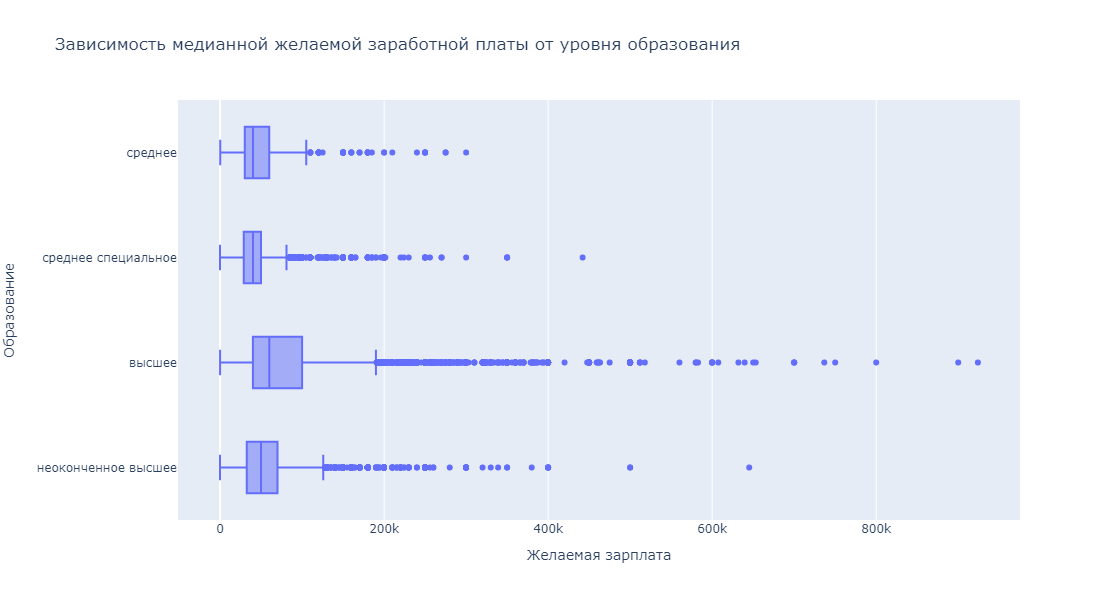

In [311]:
fig = px.box( # Построение коробчатой диаграммы
    data_frame=hh_df[hh_df['ЗП (руб)']<1000000],
    y='Образование',
    x='ЗП (руб)',
    title='Зависимость медианной желаемой заработной платы от уровня образования'
)
fig.update_layout(xaxis_title = 'Желаемая зарплата', # дополнительные настройки графика
    width=1100,
    height=600)
fig.show('png')

* Для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы?

Минимальная желаемая зарплата наблюдается при "Среднем специальном образовании", наибольшая при "Высшем образовании"

* Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?

Думаю, да, как так по графику мы видим, что с повышением качества образования увеличивается уровень зарплаты  

**Распределение желаемой заработной платы («ЗП (руб)») в зависимости от города («Город»)**

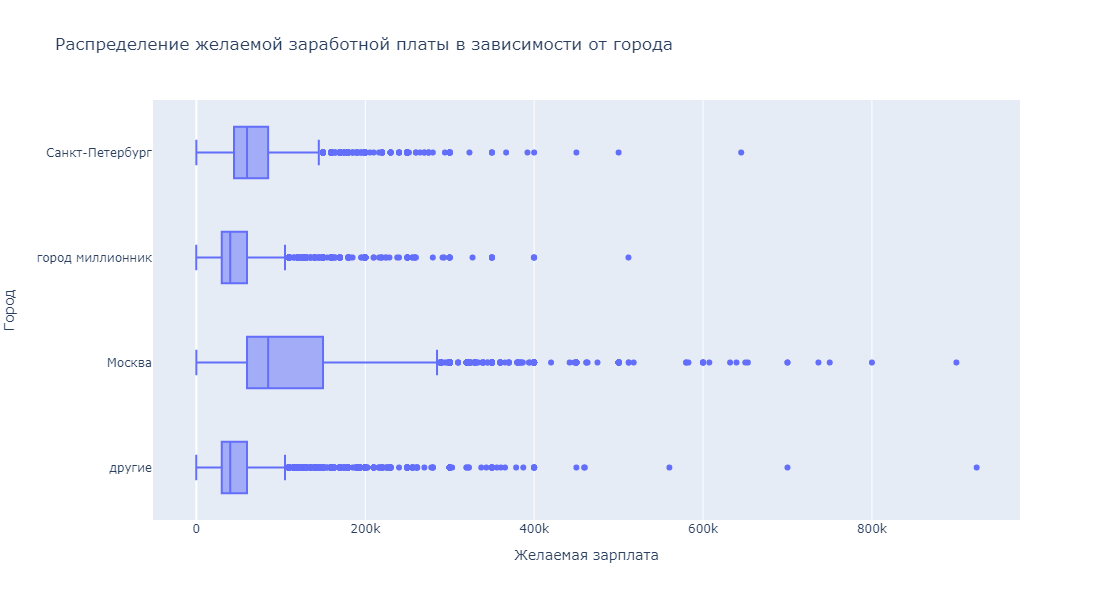

In [312]:
fig = px.box( # Построение коробчатой диаграммы
    data_frame=hh_df[hh_df['ЗП (руб)']<1000000],
    y='Город',
    x='ЗП (руб)',
    title='Распределение желаемой заработной платы в зависимости от города'
)
fig.update_layout(xaxis_title = 'Желаемая зарплата', # дополнительные настройки графика
    width=1100,
    height=600)
fig.show('png')

* Как соотносятся медианные уровни желаемой заработной платы и их размах в городах?

Чем больще размах города, тем выше желаемая зарплата. Особенно это заметно на примере Москвы. Также стоит отметить, что медианный уровень зарплаты в городах миллионниках такой же как и в остальных городах. Это лишний раз подтверждает преобладание Москвы и Санкт-Петербурга над другими городами.

* Как вы считаете, важен ли признак города при прогнозировании заработной платы?

Важен 100%, от признака города зависит уровень жизни в нем, а чем уровень выше, тем и больше ожидаемая зарплата.  


**Зависимость медианной заработной платы («ЗП (руб)») от признаков «Готовность к переезду» и «Готовность к командировкам»**

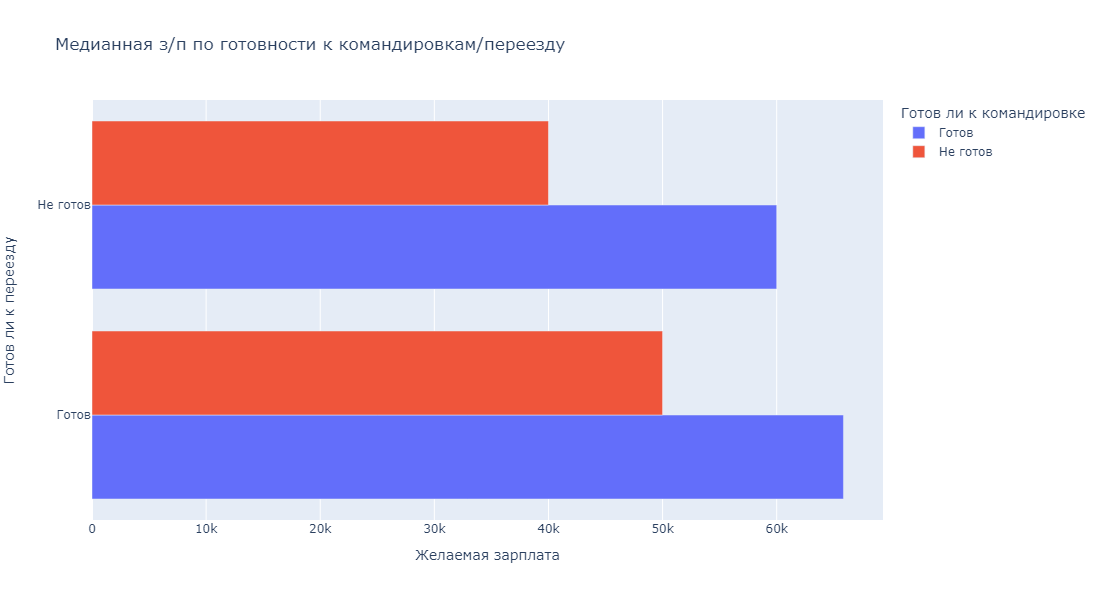

In [313]:
hh_df['Готов ли к командировке'] = hh_df['Готовность к командировкам'].apply(lambda x:'Готов' if x==True else 'Не готов') #создаем 2 признака, чтобы сделать график читабельнее
hh_df['Готов ли к переезду'] = hh_df['Готовность к переезду'].apply(lambda x:'Готов' if x==True else 'Не готов')
bar_data = hh_df.groupby( # Группировка по признакам 'Готов ли к командировке', 'Готов ли к переезду' 
    ['Готов ли к командировке', 'Готов ли к переезду'],
    as_index=False
)['ЗП (руб)'].median()
fig = px.bar( # Построение столбчатой диаграммы
    data_frame=bar_data,
    y='Готов ли к переезду',
    x='ЗП (руб)',
    barmode="group",
    color='Готов ли к командировке',
    orientation='h',
    title='Медианная з/п по готовности к командировкам/переезду'
)
fig.update_layout(xaxis_title='Желаемая зарплата', # дополнительные настройки графика
    width=1100,
    height=600)
fig.show('png')

По данной диаграмме видно, что предполагаемая зарплата больше у людей, готовым к командировкам. Также самая большая желаемая зарплата у людей, готовых к командировкам и переездам. Самая маленькая, соответственно, у тех, кто не готов ни к одному ни к другому.     

**Зависимость медианной желаемой заработной платы от возраста и образования**

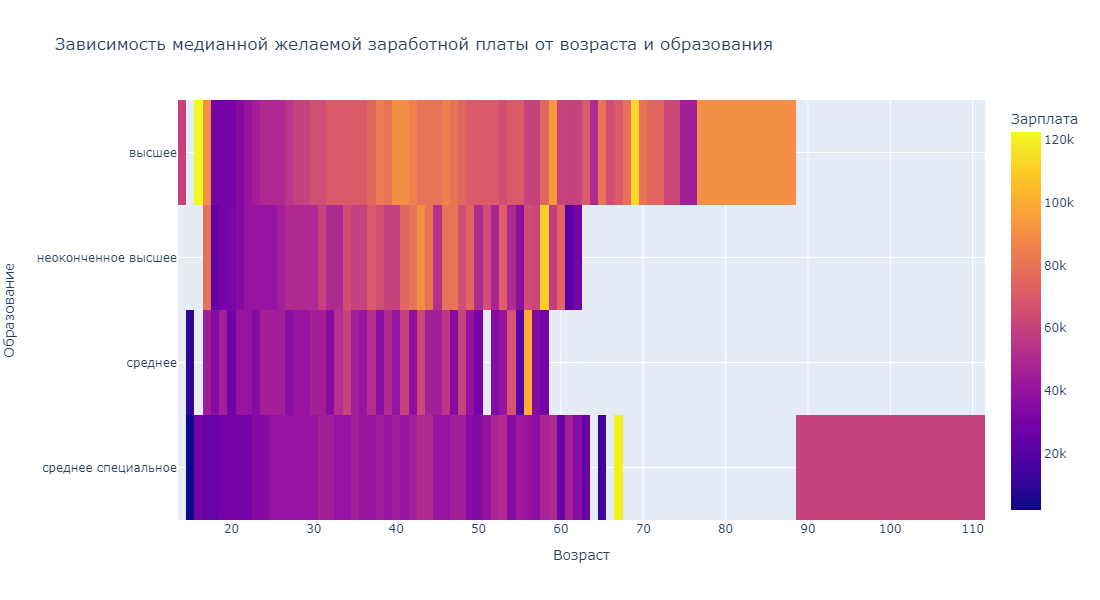

In [314]:
hh_pivot_2 = hh_df.pivot_table( # Сводная таблица для распределения зарплаты в зависимости от образования и возраста
    values='ЗП (руб)',
    index='Образование',
    columns='Возраст',
    aggfunc='median'
)
fig = px.imshow( # Построение тепловой карты
    hh_pivot_2,
    labels=dict(color="Зарплата"),
    title='Зависимость медианной желаемой заработной платы от возраста и образования'
)
fig.update_layout( # дополнительные настройки графика
    width=1100,
    height=600)
fig.show('png')


По данной тепловой карте можно сделать несколько выводов:

* Самый стремительный карьерный рост наблюдается у людей с высшым образованием

* На свой пик люди выходят в среднем в 40 лет

* Люди со средним специальным образованием имеют самый тяжелый старт по карьере

* Люди со среднем образованием раньше других перестают искать работу


**Зависимость опыта работы («Опыт работы (месяц)») от возраста пользователей («Возраст»)**

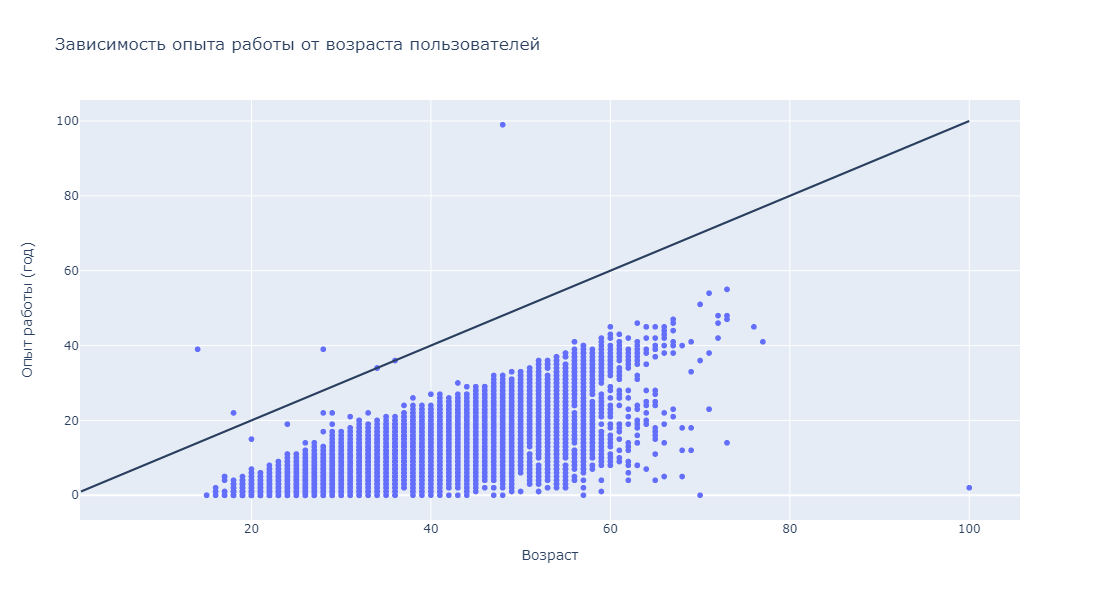

In [315]:
hh_df['Опыт работы (год)'] = hh_df['Опыт работы (месяц)'] // 12 #Создаем признак 'Опыт работы (год)'
hh_df['Опыт работы (год)'] = hh_df['Опыт работы (год)'].astype('Int16', errors='ignore')
hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы (месяц)'].astype('Int16', errors='ignore')
fig = px.scatter( # Построение рассеивающей диаграммы
    hh_df,
    y='Опыт работы (год)',
    x='Возраст',
    title='Зависимость опыта работы от возраста пользователей'
)
fig.update_layout( # дополнительные настройки графика
        shapes=[
            dict(
                type= 'line', # построение линии
                yref= 'y', y0=1, y1= 100, 
                xref= 'x', x0=1, x1= 100,)
        ],
        width=1100,
        height=600)
fig.show('png')

Распределение кажется нормальным. С увеличением возраста, увеличивается опыт работы, также видны аномалии

# Очистка данных

**Поиск и удаление дубликатов**

In [316]:
print(hh_df.duplicated().sum())
hh_df.drop_duplicates(inplace=True)


161


**Удаляем строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните медианным значением**

In [317]:
hh_df = hh_df.dropna(how='any',subset= ['Последнее/нынешнее место работы','Последняя/нынешняя должность'])
values = {'Опыт работы (месяц)': round(hh_df['Опыт работы (месяц)'].median())}
hh_df = hh_df.fillna(value=values)
hh_df['Опыт работы (месяц)'].mean()

114.35777573405711

**Удаляем резюме, в которых указана заработная плата либо выше 1 миллиона рублей, либо ниже 1 тысячи рублей**

In [318]:
release_data = hh_df[(hh_df['ЗП (руб)']<1000)| (hh_df['ЗП (руб)']>1000000)] 
hh_df.drop(release_data.index, inplace=True)
release_data.shape[0]

89

**Удаляем резюме, в которых опыт работы в годах превышает возраст соискателя**

In [319]:
outliers = hh_df[hh_df['Опыт работы (месяц)']/12 >= hh_df['Возраст']]
hh_df.drop(outliers.index, inplace=True)
outliers.shape[0]

7

**Поиск выбросов методом *z*-отклонений**

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44482


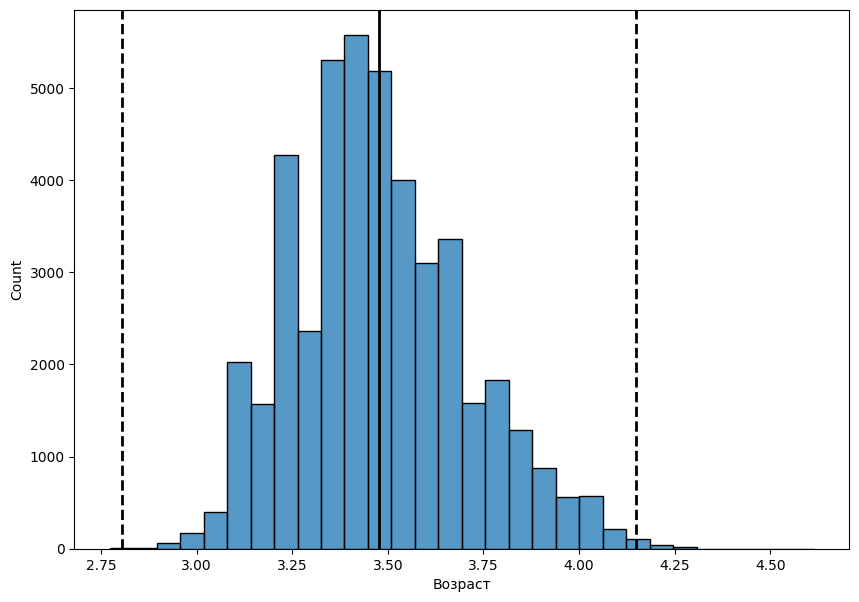

In [320]:
import seaborn as sns
import matplotlib.pyplot as plt
def price_dooc(data, feature, log_scale=False, left=3, right=4):
    if log_scale:
        x=np.log(data[feature])
    else:
        x=data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned     

outliers, cleaned = price_dooc(hh_df, 'Возраст', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

log_price = np.log(hh_df['Возраст'] + 1)
fig = plt.figure(figsize=(10, 7))
histplot = sns.histplot(log_price, bins=30)
histplot.axvline(log_price.mean(), color='k', lw=2)
histplot.axvline(log_price.mean()+ 3 * log_price.std(), color='k', ls='--', lw=2)
histplot.axvline(log_price.mean()- 3 * log_price.std(), color='k', ls='--', lw=2)
hh_df.drop(outliers.index, axis=0, inplace=True)


В результате мы удалили двух пользователей по 15 лет и одного пользователя 100 лет

**Удаляем столбцы, которые понадобились нам при построении графиков**

In [321]:
hh_df.drop('Готов ли к командировке', axis=1, inplace=True)
hh_df.drop('Готов ли к переезду', axis=1, inplace=True)
hh_df.drop('Опыт работы (год)', axis=1, inplace=True)